In [14]:
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# データの読み込み

In [15]:
data=pd.read_csv('./dataset/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/Chapter1_Introduction/data/txtdata.csv',header=None)

Text(0, 0.5, 'count')

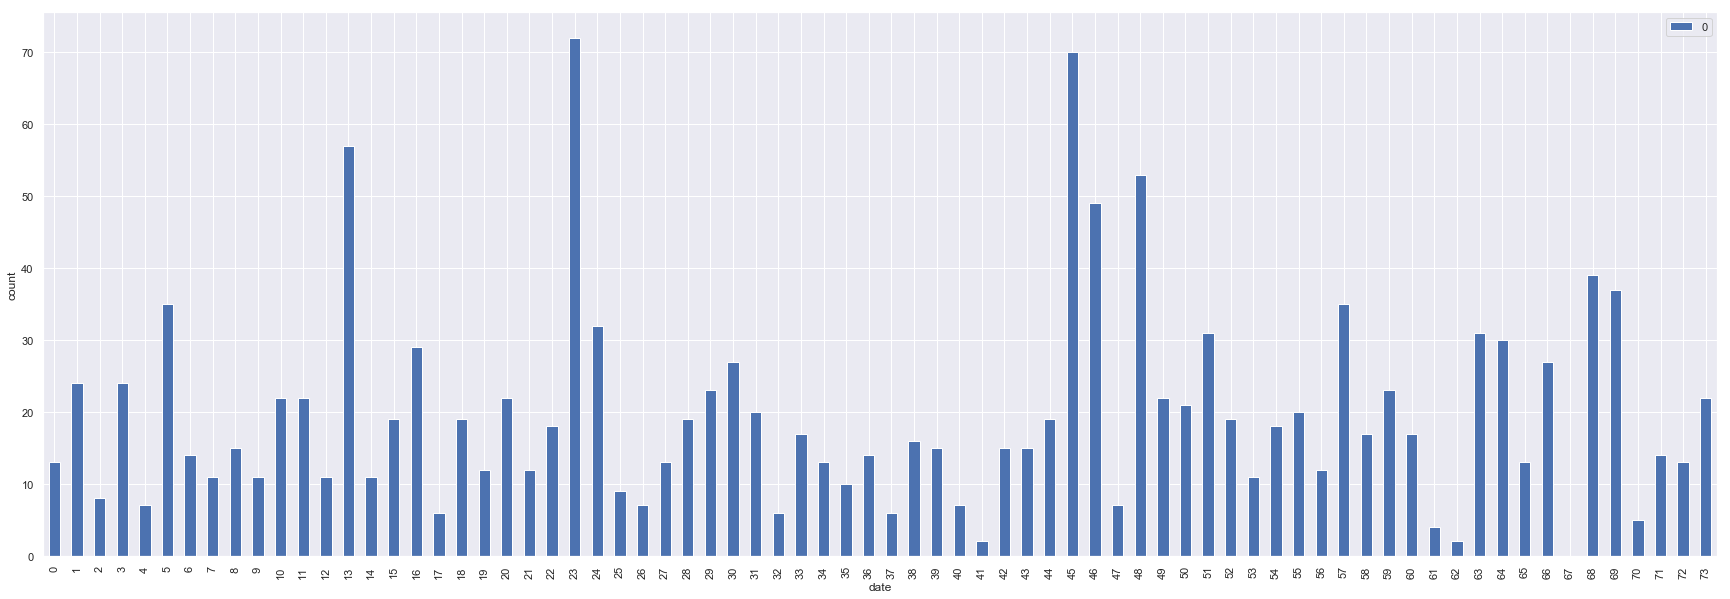

In [16]:
fig,ax=plt.subplots(figsize=(30,10))
ax=data.plot.bar(ax=ax)
ax.set_xlabel('date')
ax.set_ylabel('count')

# モデル化

## 事前分布となるモデルを構築

In [17]:
n_data=len(data)
with pm.Model() as model:
    alpha=1.0/data.values.mean()
    
    lambda_1=pm.Exponential('lambda_1',alpha)
    lambda_2=pm.Exponential('lambda_2',alpha)
    
    tau=pm.DiscreteUniform('tau',lower=0,upper=n_data-1)

In [18]:
with model:
    idx=np.arange(n_data)
    lambda_=pm.math.switch(tau>idx,lambda_1,lambda_2)

## 尤度となるモデルを構築

In [19]:
with model:
    observation=pm.Poisson('obs',lambda_,observed=data)

# サンプリング

In [20]:
with model:
    step=pm.Metropolis()
    trace=pm.sample(10000,tune=5000,step=step)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]
100%|██████████| 15000/15000 [00:57<00:00, 259.49it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


# 事後分布

In [21]:
lambda_1_smp=trace['lambda_1']
lambda_2_smp=trace['lambda_2']
tau_smp=trace['tau']

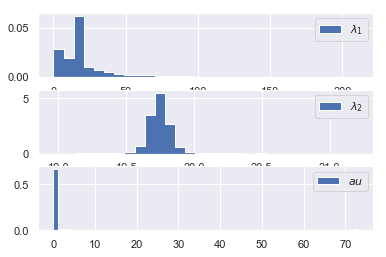

In [22]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=False)

ax1.hist(x=lambda_1_smp,bins=30,label='$\lambda_1$',normed=True,histtype='stepfilled')
ax1.legend()
ax2.hist(x=lambda_2_smp,bins=30,label='$\lambda_2$',normed=True,histtype='stepfilled')
ax2.legend()

w=1/tau_smp.shape[0]*np.ones_like(tau_smp) # 正規化のための係数
ax3.hist(weights=w,x=tau_smp,bins=n_data,label='$\tau$')
# ax3.set_xlim([0,n_data])
ax3.legend()



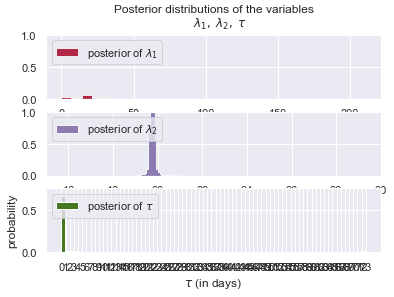

In [23]:
# figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_smp, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
# plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_smp, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_smp.shape[0] * np.ones_like(tau_smp)
plt.hist(tau_smp, bins=n_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
# plt.xlim([35, n_data-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");